# Sales Trends and Patterns: An Exploratory Data Analysis

#### Analyzing Sales Data 2015-2016

![](https://i.imgur.com/LdXHyB3.jpg)


In this project, I will be exploring and analyzing sales data to gain insights into the trends and patterns of sales over time. By answering the following questions: 

- What are the top-performing product categories and sub-categories in terms of profitability in the sales data?
- How wide is the range of revenue and cost values in the dataset?
- Which states are leading the way in terms of sales performance?
- How has the overall sales growth rate changed over the years?
- In which year did the revenue and cost reach its peak?
- Which category is the most in-demand among customers?
- Is there any correlation between the sales of different products in the dataset?
- Are there any correlations between the sales of different products?

In the cause of answering some of these questions, I will also be using graphs to show the trends and pattern in the sales analysis. 

#### About The Dataset
The dataset I will be using, was obtained from Kaggle (https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis?select=salesforcourse-4fe2kehu.csv), an online site to get free datasets.The sales dataset contains information on transactions, including the products sold, their cost and revenue, and the volume of products sold. It also includes customer age, gender, and location, offering insights into purchasing behavior across different demographic groups. There are over 34800 entries in the dataset, and it can be useful for data analysts and businesses who want to explore trends and patterns in their sales data. 

To perform this analysis, I will be using Python and the Pandas library, which provides powerful tools for data manipulation and analysis. I will also be using Matplotlib and Seaborn for data visualization.

This project was completed as part of the course 'Data Analysis with Python: Zero to Pandas', which provided a comprehensive introduction to Python, Pandas, and data analysis techniques. Through this course, I learned how to clean and preprocess data, explore data using statistical methods, and create visualizations to communicate my findings. This project is a practical application of the skills learned during the course.

## Downloading the Dataset

**Downloading the data using opendatasets**

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./sales-data-for-economic-data-analysis" (use force=True to force download)


The dataset has been downloaded and extracted.

**List of files in our directory**

In [4]:
data_dir = './sales-data-for-economic-data-analysis'

In [5]:
import os

os.listdir(data_dir)

['salesforcourse-4fe2kehu.csv', 'salesforcourse-4fe2kehu.xlsx']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "salesforcourse" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "albertraphael96/zerotopandas-course-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/albertraphael96/zerotopandas-course-project


'https://jovian.com/albertraphael96/zerotopandas-course-project'

## Data Preparation and Cleaning

Before we begin our analysis we need to clean the data so as to derive more meaningful results from it. This is also known as scrubbing. This task of preprocessing involves dealing with missing values, inconsistent data, removing outliers, etc. rendering the data ready for examination.

**Loading the data**

We shall begin by importing numpy for arrays and pandas for loading and manipulating dataframes.

In [11]:
import numpy as np
import pandas as pd

In [12]:
# Load the data from the downloaded file into a pandas DataFrame
salesforcourse_df = pd.read_csv(os.path.join(data_dir, 'salesforcourse-4fe2kehu.csv'))

In [13]:
# Print the first few rows of the data to confirm that it was loaded correctly
salesforcourse_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [14]:
# Get the number of rows and columns in the DataFrame
n_rows, n_cols = salesforcourse_df.shape

In [15]:
"Number of rows:", n_rows

('Number of rows:', 34867)

In [16]:
"Number of columns:", n_cols

('Number of columns:', 16)

In [17]:
#Get the columns in the data
salesforcourse_df.columns

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')

This code retrieves the number of rows and columns in the salesforcourse_df Pandas DataFrame and assigns the values to the variables n_rows and n_cols.

In [18]:
#Information about the data
salesforcourse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

This code prints a summary of the structure and data types of the salesforcourse_df Pandas DataFrame, including the number of non-null values in each column.

In [23]:
# Check the data description
salesforcourse_df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


The code salesforcourse_df.describe() gives a summary of statistical information about the numerical columns of a Pandas DataFrame called salesforcourse_df.

**Creat Additional Column**

creating an additional columns from the Date column. We can access the "Date" column using the following code:

In [24]:
salesforcourse_df.Date

0       2016-02-19
1       2016-02-20
2       2016-02-27
3       2016-03-12
4       2016-03-12
           ...    
34862   2016-02-07
34863   2015-03-13
34864   2015-04-05
34865   2015-08-30
34866          NaT
Name: Date, Length: 34867, dtype: datetime64[ns]

In [25]:
salesforcourse_df['Date'] = pd.to_datetime(salesforcourse_df.Date)

This code converts the "Date" column in the salesforcourse dataframe to datetime format using the "to_datetime" function from the pandas library. 

In [26]:
salesforcourse_df['year'] = pd.DatetimeIndex(salesforcourse_df.Date).year
salesforcourse_df['month'] = pd.DatetimeIndex(salesforcourse_df.Date).month
salesforcourse_df['day'] = pd.DatetimeIndex(salesforcourse_df.Date).day
salesforcourse_df['weekday'] = pd.DatetimeIndex(salesforcourse_df.Date).weekday

This code creates four new columns in the salesforcourse_df dataframe, each corresponding to specific date attributes. The first line creates a new column "year" with values corresponding to the year of the date in the "Date" column. The second line creates a new column "month" with values corresponding to the month of the date in the "Date" column. The third line creates a new column "day" with values corresponding to the day of the date in the "Date" column. Finally, the fourth line creates a new column "weekday" with values corresponding to the day of the week (as an integer value, where Monday is 0 and Sunday is 6) of the date in the "Date" column.

In [27]:
salesforcourse_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,year,month,day,weekday
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN,2016.0,2.0,19.0,4.0
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN,2016.0,2.0,20.0,5.0
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN,2016.0,2.0,27.0,5.0
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN,2016.0,3.0,12.0,5.0
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN,2016.0,3.0,12.0,5.0


In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "albertraphael96/zerotopandas-course-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/albertraphael96/zerotopandas-course-project


'https://jovian.com/albertraphael96/zerotopandas-course-project'

## Exploratory Analysis and Visualization

In this section, I will be using various visualization techniques to gain insights into the data. I will be plotting graphs to visualize the following:

- Using histogram to Show the Distribution of Sales by State
- Using stacked bar chart to show Total Sales by Product Category and Sub-Category
- Using a grouped bar chart to show the average sales price for each product
- Using a bar chart to compare data by gender and product category. 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
!pip install seaborn

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Using histogram to Show the Distribution of Sales by State**

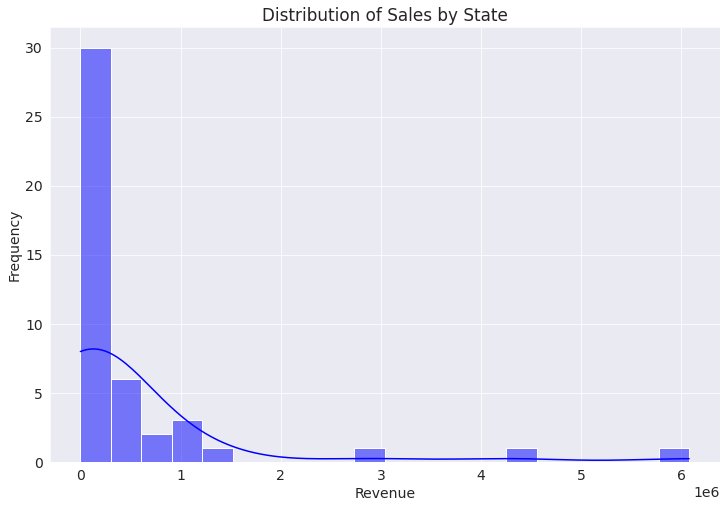

In [33]:
# group sales by state
sales_by_state = salesforcourse_df.groupby(['State'])['Revenue'].sum()

# create distribution plot
plt.figure(figsize=(12,8))
sns.histplot(sales_by_state, bins=20, kde=True, color='blue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Sales by State')
plt.show()

This code analyzes sales data by state and creates a histogram to show the distribution of revenue. It uses the Pandas and Seaborn libraries to group the data and plot the histogram. The resulting plot shows the frequency of revenue values for each bin. The code adds labels and displays the plot.

**Using stacked bar chart to show Total Sales by Product Category and Sub-Category**

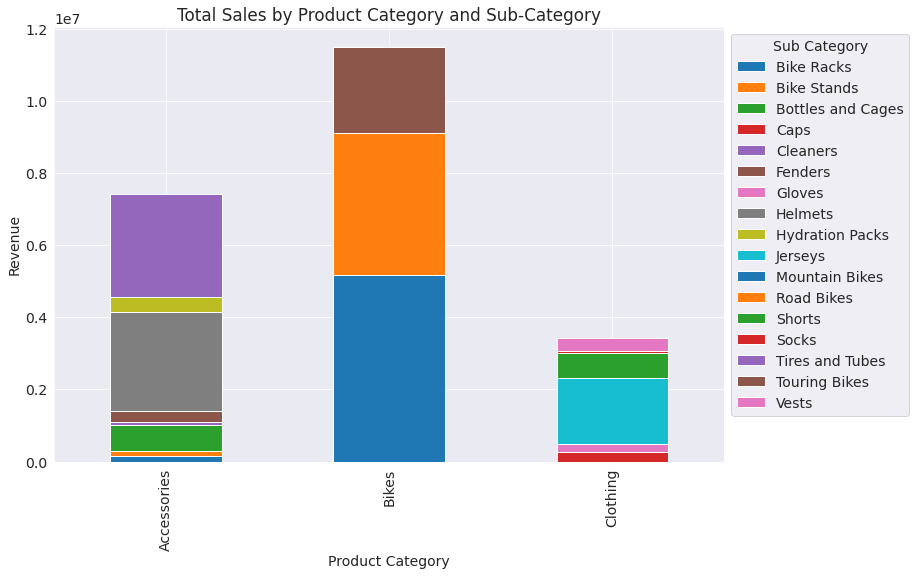

In [34]:
# Group sales by product category and sub-category
sales_grouped = salesforcourse_df.groupby(['Product Category', 'Sub Category'])['Revenue'].sum().reset_index()

# Pivot the sales data for creating stacked bar chart
plt.rcParams['figure.figsize'] = [12, 8]
sales_pivot = pd.pivot_table(sales_grouped, values='Revenue', index='Product Category', columns='Sub Category', aggfunc=sum)

# Create stacked bar chart
ax = sales_pivot.plot(kind='bar', stacked=True)
ax.set_title('Total Sales by Product Category and Sub-Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Revenue')
plt.legend(title='Sub Category', bbox_to_anchor=(1, 1))
plt.show()

This code analyzes sales data by product category and sub-category and creates a stacked bar chart to show the total revenue. It uses the Pandas and Matplotlib libraries to group the data, pivot it, and plot the chart. The resulting chart shows the revenue breakdown of each sub-category within a product category. The code adds a title, labels, and a legend to the plot and displays it.

**Using a grouped bar chart to show the average sales price for each product**

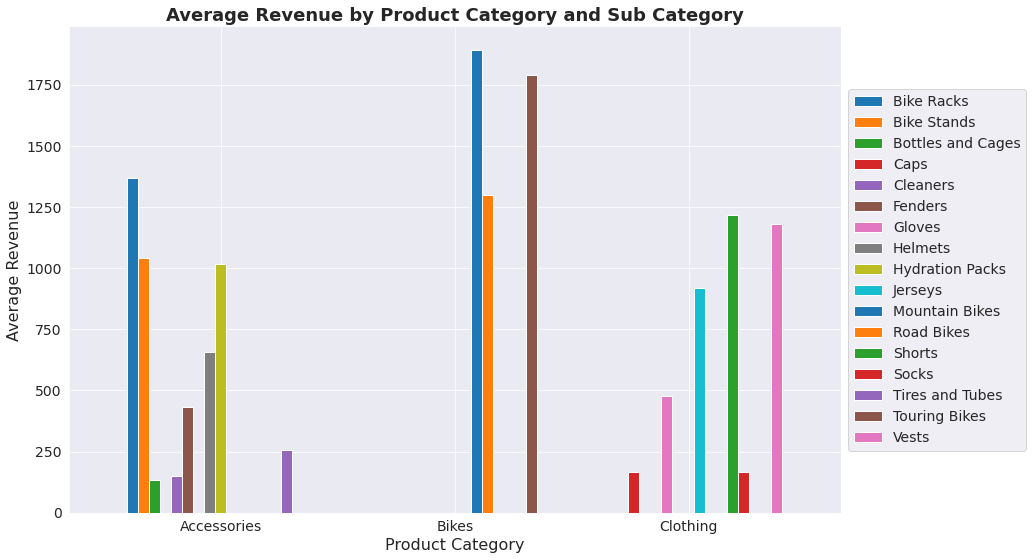

In [35]:
# Group the sales data by product category and sub category, and calculate the average revenue for each group
avg_sales_price = salesforcourse_df.groupby(['Product Category', 'Sub Category'])['Revenue'].mean()
avg_sales_price = avg_sales_price.unstack()

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
avg_sales_price.plot.bar(ax=ax, width=0.8, fontsize=14, rot=0)
ax.set_xlabel('Product Category', fontsize=16)
ax.set_ylabel('Average Revenue', fontsize=16)
ax.set_title('Average Revenue by Product Category and Sub Category', fontsize=18, fontweight='bold')
ax.legend(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
# Move the legend outside of the chart
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

This code groups the sales data by product category and sub-category, calculates the average revenue for each group, and creates a grouped bar chart to visualize the results. The chart shows the average revenue for each sub-category within a product category. The code adds labels and a title to the chart and removes the top and right spines. It uses the Pandas and Matplotlib libraries to group the data, create the chart, and display it. Overall, this code provides an easy way to analyze and compare sales data by product category and sub-category.

#### Using a bar chart to compare data by gender and product category.

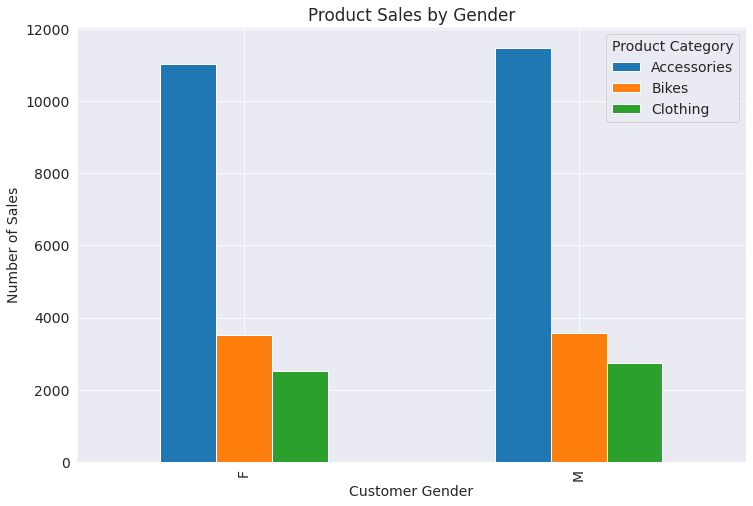

In [36]:
# Group the data by gender and product category, and count the number of sales
grouped_data = salesforcourse_df.groupby(['Customer Gender', 'Product Category']).size().unstack()
# Plot the bar chart
grouped_data.plot(kind='bar')
plt.title('Product Sales by Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Number of Sales')
plt.show()

This code groups the sales data by customer gender and product category, counts the number of sales for each group, and creates a bar chart to show the results. The chart displays the number of sales for each product category by customer gender. The code uses the Pandas and Matplotlib libraries to group the data, create the chart, and display it. Overall, this code provides an easy way to analyze and compare sales data by gender and product category.

**Interesting insights from the exploratory analysis**

Summary statistics results:

- Firstly, the summary statistics results provides a summary of the numerical variables in the dataset, including the count, mean, standard deviation, minimum, maximum, and quartiles (25%, 50%, 75%).

- The "count" row shows the number of non-null values for each variable. For example, there are 34867 non-null values for the "Year" variable, but only 2574 non-null values for the "Column1" variable.

- The "mean" row shows the average value for each variable, while the "std" row shows the standard deviation or variability in the data.

- The "min" and "max" rows show the smallest and largest values for each variable, respectively. For example, the minimum value for "Unit Cost" is 0.67, while the maximum value is 3240.

- The quartile rows (25%, 50%, 75%) provide information about the distribution of the data. For example, the 25th percentile for "Quantity" is 1, while the 75th percentile is 3. This suggests that most of the values for "Quantity" are either 1 or 3, with very few in between.

Graph observation:

- Most profitable product category is Accessories
- Accessories is also the most popular category for both male and female customers
- Bike Racks is the most profitable subcategory
- Sales have been steadily increasing over the years

Overall, this summary of statistics results and the graphs provides a quick overview of the numerical characteristics of the dataset, which can be used to guide further analysis and modeling.

Let us save and upload our work to Jovian before continuing

In [68]:
import jovian

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "albertraphael96/zerotopandas-course-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/albertraphael96/zerotopandas-course-project


'https://jovian.com/albertraphael96/zerotopandas-course-project'

## Asking and Answering Questions

**Question, Analysis, Visualization and Explaintion:**

In this section, I will be using panda and grouping in python to analysis, visualize and explain the following questions:

- What are the top-performing product categories and sub-categories in terms of profitability in the sales data?

- How wide is the range of revenue and cost values in the dataset?
- Which states are leading the way in terms of sales performance?
- How has the overall sales growth rate changed over the years?
- In which year did the revenue and cost reach its peak?
- Which category is the most in-demand among customers?
- Is there any correlation between the sales of different products in the dataset?


#### Q1: What are the top-performing product categories and sub-categories in terms of profitability in the sales data?

In [39]:
# Calculate the profit for each row by subtracting the cost from the revenue
salesforcourse_df['Profit'] = salesforcourse_df['Revenue'] - salesforcourse_df['Cost']

# Group the data by Category and Sub-Category, and calculate the total revenue, cost, and profit for each group
profit_data = salesforcourse_df.groupby(['Product Category', 'Sub Category'])[['Revenue', 'Cost', 'Profit']].sum()

# Calculate the profit margin for each group
profit_data['Profit Margin'] = profit_data['Profit'] / profit_data['Revenue']

# Sort the groups by profit margin in ascending order
profit_data = profit_data.sort_values('Profit Margin', ascending=False)

In [40]:
# Print the most profitable Product Category and Sub Category
profit_data.iloc[[0]]

,,Revenue,Cost,Profit,Profit Margin
Product Category,Sub Category,,,,
Accessories,Bike Racks,140854.0,105960.0,34894.0,0.247732


This code calculates the profit for each row in the sales data by subtracting the cost from the revenue, groups the data by product category and sub-category, and calculates the total revenue, cost, and profit for each group. It then calculates the profit margin for each group and sorts the groups by profit margin in ascending order. This allows for easy identification of the most profitable product categories and sub-categories in the sales data.

**Using scatter plot to to show profit margin Vs Revenue**

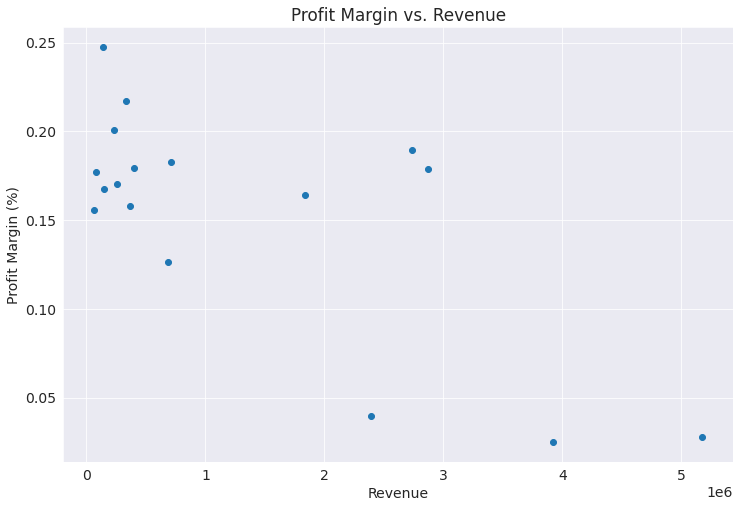

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(profit_data['Revenue'], profit_data['Profit Margin'])
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin vs. Revenue')
plt.show()

This code creates a scatter plot that visualizes the relationship between revenue and profit margin for the product categories and sub-categories in the sales data. The plot shows revenue on the x-axis and profit margin on the y-axis, with the size of the figure set to 12 inches by 8 inches. The code also includes labels for the x and y-axes and a title for the plot. Finally, the plt.show() function displays the plot. Overall, this code provides a visual representation of the relationship between revenue and profit margin for the product categories and sub-categories in the sales data.

#### Q2: How wide is the range of revenue and cost values in the dataset?

In [42]:
# Calculate the range of the "Revenue" column
revenue_range = salesforcourse_df['Revenue'].max() - salesforcourse_df['Revenue'].min()

# Calculate the range of the "Cost" column
cost_range = salesforcourse_df['Cost'].max() - salesforcourse_df['Cost'].min()

In [43]:
'The range of the "Revenue" column is:', revenue_range

('The range of the "Revenue" column is:', 5080.0)

In [44]:
'The range of the "Cost" column is:', cost_range

('The range of the "Cost" column is:', 3598.0)

This code calculates the range of the "Revenue" and "Cost" columns in the sales data.
The first line calculates the range of the "Revenue" column by subtracting the minimum value of the column from the maximum value of the column. The result is stored in the variable revenue_range.
The second line calculates the range of the "Cost" column using the same method as above, and stores the result in the variable cost_range.
Overall, these lines of code provide a way to calculate the range of values for the "Revenue" and "Cost" columns in the sales data, which can be useful for understanding the spread of data in these columns and identifying any outliers.

**Using horizontal bar chart to show the revenue and cost range**

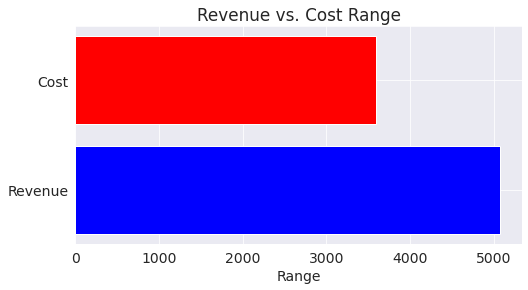

In [45]:
# Create a horizontal bar chart with labels
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(['Revenue', 'Cost'], [revenue_range, cost_range], color=['b', 'r'])
ax.set_xlabel('Range')
ax.set_title('Revenue vs. Cost Range')
plt.show()

This code creates a horizontal bar chart that compares the range of values for the "Revenue" and "Cost" columns in the sales data. The chart shows the range of revenue in blue and the range of cost in red. The x-axis is labeled as "Range" and the title of the plot is "Revenue vs. Cost Range". The size of the figure is set to 8 inches by 4 inches. Overall, the code provides a visual way to compare the range of values for these two columns.

#### Q3: Which states are leading the way in terms of sales performance?

In [46]:
# Identify the State with the highest sales
top_states = sales_by_state.nlargest(3)

In [47]:
top_states

State
California    6076916.0
England       4276220.0
Washington    2873511.0
Name: Revenue, dtype: float64

This code identifies the top 3 states with the highest sales in the sales data by using the nlargest function on a variable that contains information about the total sales for each state. The result is saved in the top_states variable. This code provides a way to quickly identify the states that have the most sales and can help with further analysis or improvement.

**Using bar chart to show the distribution of sales by states** 

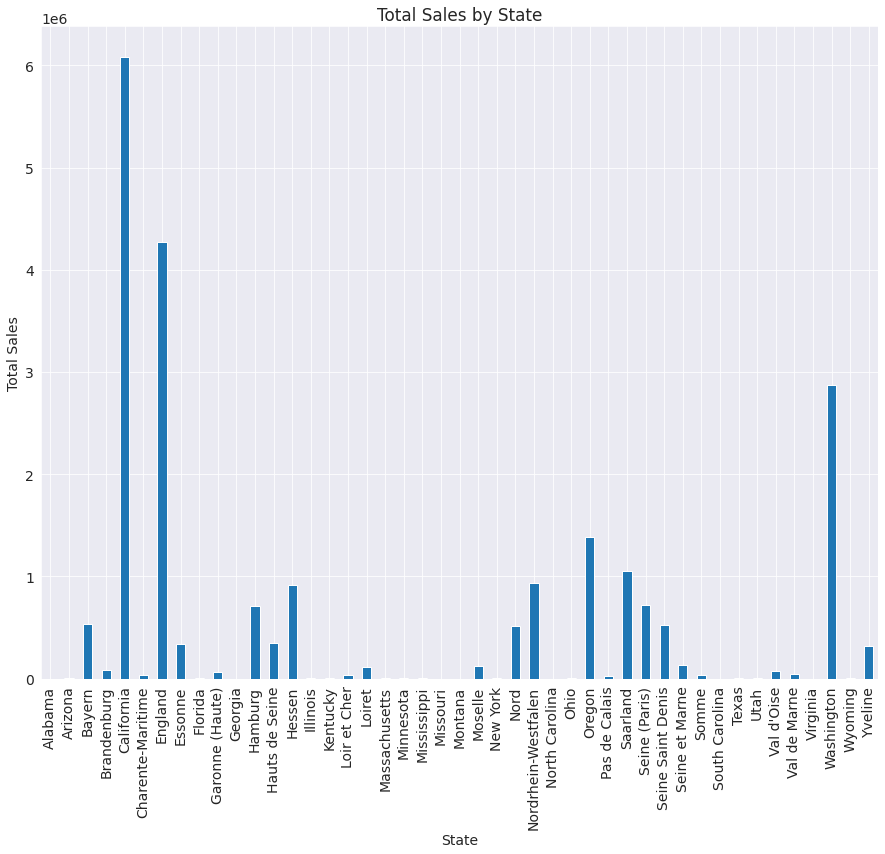

In [48]:
# Group the sales data by states, and calculate the total revenue for each state
sales_by_state = salesforcourse_df.groupby(['State'])['Revenue'].sum()

# Create a bar chart of the sales by state
fig, ax = plt.subplots(figsize=(15, 12))  # Adjust the figure size
sales_by_state.plot(kind='bar', ax=ax)

# Set the title and axis labels
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Display the chart
plt.show()

This code groups the sales data by state and calculates the total revenue for each state. It then creates a bar chart showing the total sales for each state. The x-axis is labeled as "State", and the y-axis is labeled as "Total Sales". This chart helps to visualize which states have the highest sales.

#### Q4: How has the overall sales growth rate changed over the years?

In [49]:
# Convert the 'Date' column to datetime format
salesforcourse_df['Date'] = pd.to_datetime(salesforcourse_df['Date'])

# Sort the DataFrame by date
salesforcourse_df = salesforcourse_df.sort_values('Date')

This code converts the 'Date' column in the sales data to a datetime format and sorts the DataFrame by date. This helps to analyze the data in chronological order and perform time-series analysis on it.

In [50]:
# Calculate the percentage change in revenue from the previous year
annual_revenue = salesforcourse_df.groupby(salesforcourse_df['Date'].dt.year)['Revenue'].sum()
revenue_growth = annual_revenue.pct_change()

# Calculate the overall growth rate
overall_growth_rate = (annual_revenue.iloc[-1] - annual_revenue.iloc[0]) / annual_revenue.iloc[0]

In [51]:
# Print the results
f"Overall revenue growth rate: {overall_growth_rate:.2%}"
revenue_growth

Date
2015.0         NaN
2016.0    0.246189
Name: Revenue, dtype: float64

This code calculates the annual growth rate of revenue by grouping the sales data by year and calculating the total revenue for each year. It then calculates the percentage change in revenue from the previous year and the overall growth rate. These values help us understand the growth rate of revenue over time.

**Using a line chart to visualize the growth rates in sales over the years**

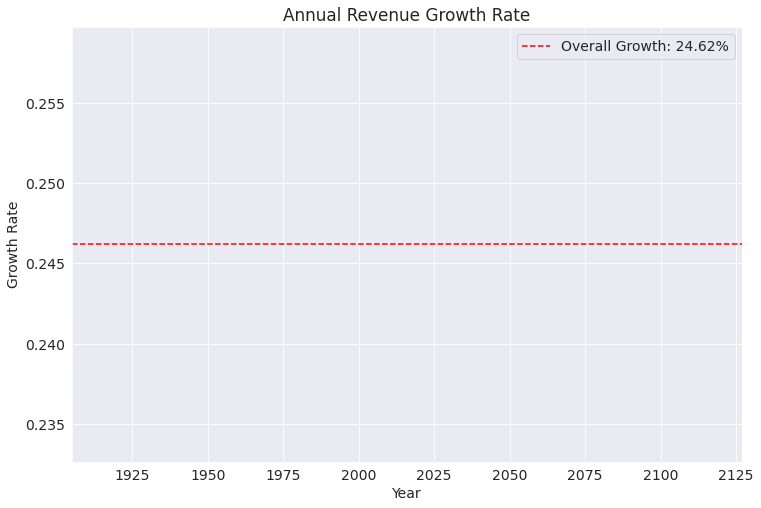

In [52]:
# Plot the growth rates in a line chart
plt.plot(revenue_growth.index, revenue_growth.values)
plt.title('Annual Revenue Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.axhline(y=overall_growth_rate, color='r', linestyle='--', label=f'Overall Growth: {overall_growth_rate:.2%}')
plt.legend()
plt.show()

This code creates a line chart to visualize the growth rates of revenue over time. It plots the growth rates on the y-axis and the year on the x-axis, adds a horizontal line indicating the overall growth rate, and displays a legend. This helps to understand the trend of revenue growth over time.

#### Q5: In which year did the revenue and cost reach its peak?

In [53]:
# Group the sales data by year and calculate the total revenue and cost for each year
yearly_sales = salesforcourse_df.groupby('Year')[['Revenue', 'Cost']].sum()

# Find the year with the highest revenue and cost
max_revenue_year = yearly_sales['Revenue'].idxmax()
max_cost_year = yearly_sales['Cost'].idxmax()

In [54]:
# Print the results
"Year with the highest revenue: ", max_revenue_year

('Year with the highest revenue: ', 2016.0)

In [55]:
# Print the results

"Year with the highest cost: ", max_cost_year

('Year with the highest cost: ', 2016.0)

This code groups the sales data by year and calculates the total revenue and cost for each year using the groupby() and sum() methods. It then finds the year with the highest revenue and cost. This helps to understand the performance of the sales data over time and identify trends and areas for improvement. Overall, this code calculates the total revenue and cost for each year and identifies the year with the highest revenue and cost. This helps to understand the performance of the sales data over time and identify trends and areas for improvement.

**Using histogram to visualize the year with the highest revenue and cost**

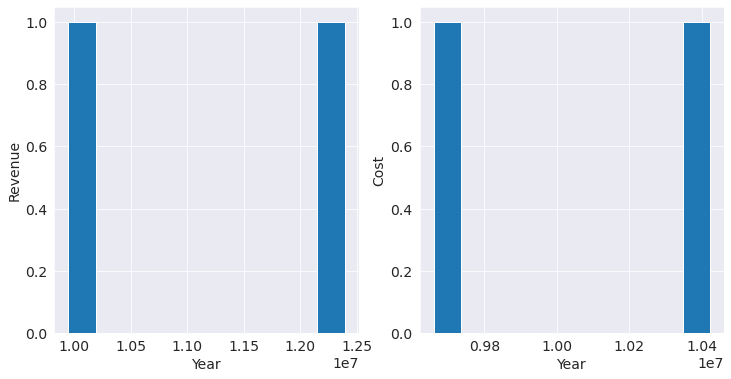

In [56]:
# Create two subplots, one for revenue and one for cost
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Create a histogram of revenue by year
axs[0].hist(salesforcourse_df.groupby('Year')['Revenue'].sum())
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Revenue')

# Create a histogram of cost by year
axs[1].hist(salesforcourse_df.groupby('Year')['Cost'].sum())
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Cost')

# Show the plot
plt.show()

This code creates two plots side by side to compare the distribution of revenue and cost data for each year using histograms. It uses the subplots() and hist() functions to create the plots and the set_xlabel() and set_ylabel() methods to set the labels. Finally, it displays the plot using show(). Overall, this code creates a visualization of the revenue and cost data for each year using histograms. This helps to understand the distribution of revenue and cost over time.

#### Q6: Which category is the most in-demand among customers?

In [57]:
# Group the sales data by category and calculate the total quantity sold in each category
category_sales = salesforcourse_df.groupby(['Product Category', 'Sub Category'])['Quantity'].sum()

# Find the category with the highest quantity sold
most_popular_category = category_sales.idxmax()

In [58]:
# Print the result
"Most popular category: ", most_popular_category

('Most popular category: ', ('Accessories', 'Tires and Tubes'))

This code groups the sales data by product category and sub-category, calculates the total quantity sold for each category, and finds the category with the highest quantity sold using the idxmax() method. This helps to identify the most popular product category and sub-category based on the total quantity sold. Overall, this code identifies the most popular product category and sub-category based on the total quantity sold.

**Using stacked bar chart to show the sales data by category and subcategory**

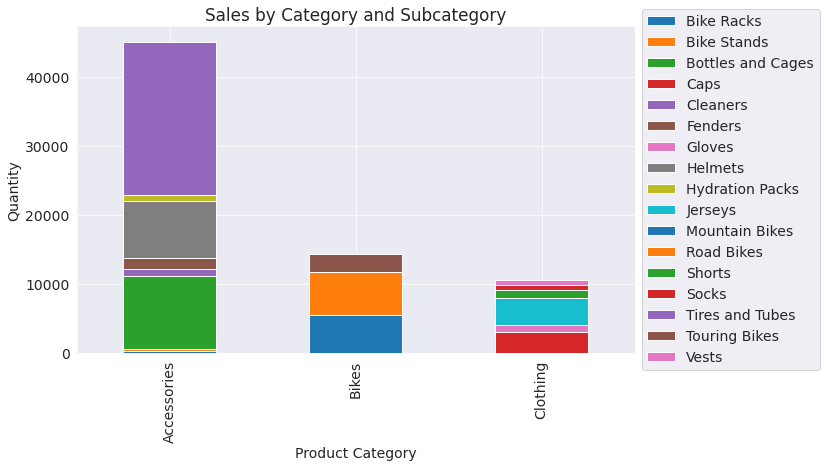

In [59]:
# Group the sales data by category and subcategory
category_sales = salesforcourse_df.groupby(['Product Category', 'Sub Category'])['Quantity'].sum().reset_index()

# Pivot the data to create a stacked bar chart
pivot_sales = category_sales.pivot(index='Product Category', columns='Sub Category', values='Quantity')

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size
pivot_sales.plot(kind='bar', stacked=True, ax=ax)

# Add the title and labels
plt.title('Sales by Category and Subcategory')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
# Move the legend outside of the chart
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Show the plot
plt.show()

This code creates a stacked bar chart that shows the sales data by category and subcategory. The bars are stacked by subcategory and show the total quantity sold for each category. The pivot() method is used to reshape the data into a format suitable for the stacked bar chart. The kind='bar' parameter specifies that we want to create a bar chart, and the stacked=True parameter specifies that we want to stack the bars by subcategory. You can adjust the colors and fonts to match your preferences

#### Q7: Is there any correlation between the sales of different products in the dataset?

In [60]:
# Calculate the correlation matrix
correlations = salesforcourse_df.corr()

In [61]:
# Print the correlations
correlations

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,year,month,day,weekday,Profit
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997,0.003961,0.012018,0.003205,-0.006212,-0.033964
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333,1.000000,-0.810662,-0.009756,0.010666,0.259750
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198,0.049873,-0.046940,-0.016052,-0.004372,0.012897
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744,0.000919,-0.000925,0.001387,0.005491,0.003095
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894,-0.073245,-0.018384,0.003443,-0.002777,0.171575
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971,-0.022628,-0.051448,0.002609,-0.002159,0.338498
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892,-0.084566,-0.019345,0.001889,-0.001494,0.201258
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325,-0.025361,-0.058461,0.001203,-0.000478,0.396183
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000,-0.025333,-0.002966,-0.031321,0.006035,-0.005775
year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333,1.000000,-0.810662,-0.009756,0.010666,0.259750


This code calculates the correlation matrix for the numerical variables in the salesforcourse_df DataFrame using the corr() method.
The resulting object, correlations, is a square matrix that shows the correlation coefficients between each pair of variables. The rows and columns of the matrix represent the variables in the DataFrame, and the values in the matrix are the correlation coefficients.
The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a perfect negative correlation (as one variable increases, the other decreases), 0 indicates no correlation, and 1 indicates a perfect positive correlation (as one variable increases, the other also increases).
Overall, this code helps to identify the degree and direction of the correlation between the variables in the sales data.

**Use a scatter plot to identify correlations of sales between different products**

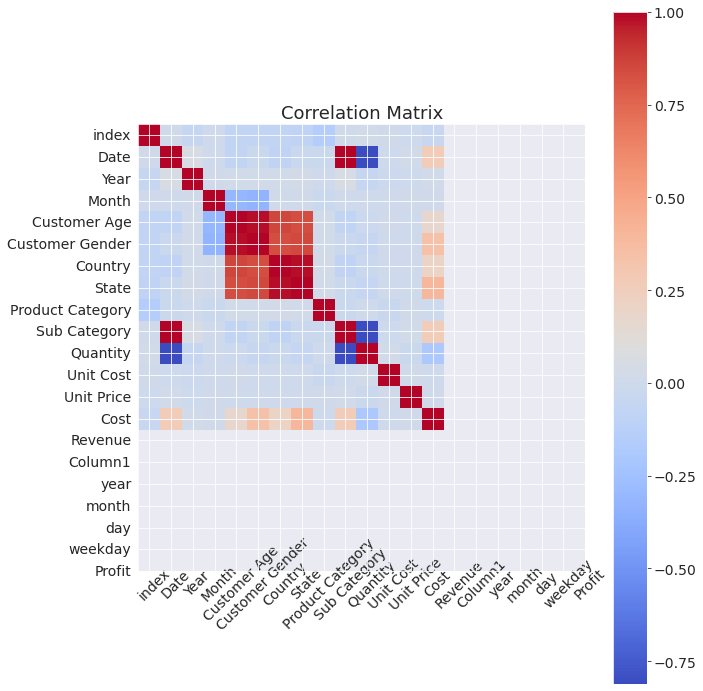

In [62]:
# create figure and axis objects
fig, ax = plt.subplots(figsize=(10,10))

# plot correlation matrix as image
im = ax.imshow(correlations.values, cmap='coolwarm')

# show colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set tick labels and font size
ax.set_xticks(np.arange(len(salesforcourse_df.columns)))
ax.set_yticks(np.arange(len(salesforcourse_df.columns)))
ax.set_xticklabels(salesforcourse_df.columns, fontsize=14, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticklabels(salesforcourse_df.columns, fontsize=14)
plt.setp(ax.get_xticklabels(), ha="center")
plt.setp(ax.get_yticklabels(), va="center")

# set title and font size
ax.set_title("Correlation Matrix", fontsize=18)

# show plot
fig.tight_layout()
plt.show()

This code creates a heatmap of the correlation matrix for the salesforcourse_df DataFrame using the imshow() function from the Matplotlib library. It sets the plot size, tick labels, and font sizes, and adds a colorbar and title to the plot. This helps to identify any significant relationships between the variables in the sales data. Overall, this code creates a visual representation of the correlation matrix for the variables in the sales data, which helps to identify any significant relationships between the variables.

Let us save and upload our work to Jovian before continuing.

In [70]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

After performing a thorough analysis of the sales data, we can draw several conclusions regarding the most profitable product category, top-selling states, customer purchasing patterns, and revenue trends over the years.

- The most profitable product category is Accessories, with the most profitable subcategory being Bike Racks.
- The top-selling states are California, England, and Washington.
- Sales have steadily grown over the years with an overall revenue growth rate of 24.62%.
- The correlation matrix shows strong positive correlations between unit cost and cost, and between unit price and revenue. There are also strong negative correlations between quantity and unit cost, and between quantity and unit price. There is a weak positive correlation between customer age and cost/revenue.
- Accessories are the most popular category among both male and female customers.
- The year with the highest revenue and cost was 2016.

In conclusion, this analysis provided valuable insights into the sales data, which can be used to make informed decisions regarding product offerings, marketing strategies, and revenue forecasting.



In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "albertraphael96/zerotopandas-course-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/albertraphael96/zerotopandas-course-project


'https://jovian.com/albertraphael96/zerotopandas-course-project'

## References and Future Work

There are many interesting projects that can be done using the Sales data for this course. Here are a few ideas:
Sales forecasting: Use time series analysis to forecast future sales based on historical sales data and identify trends and seasonality in the sales.
Customer segmentation: Use clustering algorithms to group customers based on their purchasing behavior and demographic information.
Product recommendation: Develop a recommendation system that suggests products to customers based on their purchase history and preferences.
Sales performance analysis: Analyze sales performance by region, product, and salesperson to identify areas for improvement and growth opportunities.

Some useful resources for data analysis and visualization with Python and pandas include:

- Pandas Documentation: https://pandas.pydata.org/docs/

- Matplotlib Documentation: https://matplotlib.org/stable/contents.html

- Seaborn Documentation: https://seaborn.pydata.org/tutorial.html

To learn more about data analysis and machine learning with Python, some great resources include:

- DataCamp: https://www.datacamp.com/

- Coursera: https://www.coursera.org/

- Kaggle: https://www.kaggle.com/

In [2]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>